In [23]:
import pandas as pd
import numpy as np

In [24]:
class_labels = pd.read_csv("class_accuracy.csv")
pixel_count = pd.read_csv("label_pixel_counts.csv")

<Axes: xlabel='Label'>

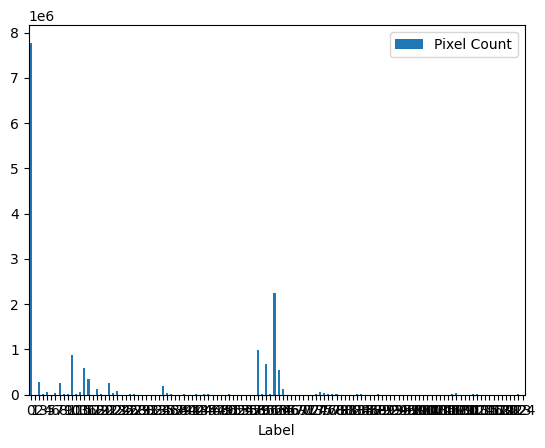

In [25]:
# Plot the pixel count for each class
pixel_count.plot.bar(x='Label', y='Pixel Count', rot=0)

In [26]:
# Merge the pixel count and the class labels
merged = pd.merge(class_labels, pixel_count, left_on="GT", right_on="Label")

In [27]:
# Group by "4th_tier_ENG" and create lists of pixel counts from the "GT" column
grouped_gt_codes = merged.groupby("4th_tier_ENG").agg(
    GT_list=("GT", list),
    pixel_sum=("Pixel Count", sum)
).reset_index()



In [28]:
grouped_gt_codes# Which groups are above 100000 pixels?

grouped_gt_codes[grouped_gt_codes["pixel_sum"] > 50000] # Can you set all the pixel counts to 0 for the groups that are above 100000 pixels?

# Assuming your DataFrame is named `grouped_gt_codes`

# Filter rows where 'pixel_sum' is less than 50,000
filtered_gt = grouped_gt_codes[grouped_gt_codes['pixel_sum'] > 50000].reset_index(drop=True)
filtered_gt_list =  filtered_gt['GT_list'].tolist()

# Display the filtered GT_list
combined_gt_list = sum(filtered_gt_list, [])

# Drop the pixel_sum column
grouped_gt_codes.drop(columns=['pixel_sum'], inplace=True)
filtered_gt["relabel"] = filtered_gt.index + 1



<Axes: xlabel='4th_tier_ENG'>

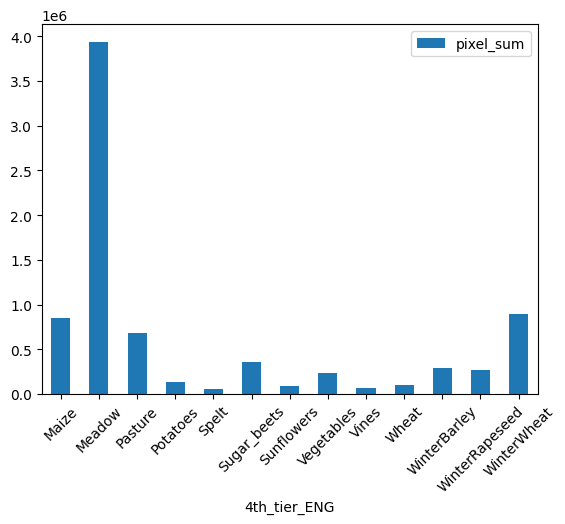

In [29]:
filtered_gt.plot.bar(x='4th_tier_ENG', y='pixel_sum', rot=45)


In [30]:

# Set all the labels that are not in the combined_gt_list to 0
cero_labels = merged[~merged['GT'].isin(combined_gt_list)]

In [31]:
# Get the GT list of the cero_labels
cero_labels_list = cero_labels['GT'].tolist()
filtered_gt # Add new row with cero labels
new_row = pd.DataFrame({'4th_tier_ENG': ['cero_labels'], 'GT_list': [cero_labels_list], 'relabel': [0]})

# concat the new row to the filtered_gt
filtered_gt = pd.concat([filtered_gt, new_row], ignore_index=True)



In [32]:
filtered_gt.to_json("filtered_relabel_gt.json", orient="records")

In [33]:
# Sum all the pixel sums and then get calculate the weights
total_pixels = filtered_gt["pixel_sum"].sum()
pixel_counts = filtered_gt["pixel_sum"].values
pixel_counts = pixel_counts[:-1]

In [19]:
p

array([ 849603., 3938448.,  676231.,  135744.,   57620.,  351319.,
         86541.,  232799.,   68329.,   99174.,  287496.,  264703.,
        888359.,      nan])

In [34]:
# Apply logarithmic scaling (add 1 to avoid log(0) issues)
class_weights = np.log(total_pixels / pixel_counts + 1)

# Normalize if necessary
class_weights = class_weights / np.sum(class_weights) * len(pixel_counts)
filtered_gt.drop(columns=["pixel_sum"], inplace=True)

In [35]:
class_weights

array([0.68259812, 0.32247087, 0.74346263, 1.19371417, 1.44125069,
       0.92356432, 1.32345789, 1.03959755, 1.39183377, 1.28410447,
       0.97988545, 1.00320957, 0.67085051])